<a href="https://colab.research.google.com/github/sooosunny/myweb_sohye/blob/main/0520_Reddit_K_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reddit Crawlling

In [3]:
!pip install -q psaw pandas tqdm

In [6]:
!pip install praw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 9.0 MB/s eta 0:00:00


API 설정

In [10]:
import praw

# 본인의 Reddit API 정보
client_id = '29pjDQqwfJCdh_xzfz30Mw'
client_secret = 'LL_Un8Y_z-MDuruB2W718aLrJNhjpA'
user_agent = 'reddit-kfood-analysis (by u/your_reddit_username)'

reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    user_agent=user_agent
)

게시글 + 댓글 수집 함수

In [13]:
import pandas as pd
from tqdm.notebook import tqdm
import time

def search_posts_with_comments(keyword, subreddit_name, limit_per_batch=200, repeat=5, sleep_sec=2):
    """
    키워드와 서브레딧 이름을 입력받아 게시글과 댓글을 수집.
    - limit_per_batch: 한 번에 수집할 게시글 수
    - repeat: 수집 반복 횟수 (시간순 정렬된 중복 없는 데이터 확보 목적)
    - sleep_sec: Reddit API rate limit을 피하기 위한 대기 시간
    """
    subreddit = reddit.subreddit(subreddit_name)
    posts = []
    comments = []
    seen_ids = set()

    for i in range(repeat):
        print(f"🔁 수집 반복 {i+1}/{repeat} — '{keyword}' in r/{subreddit_name}")
        for post in subreddit.search(keyword, sort='new', limit=limit_per_batch):
            if post.id in seen_ids:
                continue
            seen_ids.add(post.id)

            posts.append({
                'id': post.id,
                'subreddit': subreddit_name,
                'title': post.title,
                'selftext': post.selftext,
                'score': post.score,
                'created_utc': post.created_utc,
                'keyword': keyword
            })

            # 댓글 수집
            try:
                post.comments.replace_more(limit=0)
                for comment in post.comments.list():
                    comments.append({
                        'post_id': post.id,
                        'comment_id': comment.id,
                        'comment_body': comment.body
                    })
            except Exception as e:
                print(f"⚠️ 댓글 수집 실패 (post id: {post.id}) - {e}")

        time.sleep(sleep_sec)  # 요청 간 대기 시간 추가

    return posts, comments

In [14]:
keywords = ['kimchi', 'tteokbokki', 'bibimbap', 'korean street food']
subreddits = ['KoreanFood', 'food', 'AskCulinary']

all_posts = []
all_comments = []

for kw in keywords:
    for sr in subreddits:
        posts, comments = search_posts_with_comments(
            keyword=kw,
            subreddit_name=sr,
            limit_per_batch=200,
            repeat=5,  # 총 1000개까지 시도
            sleep_sec=2
        )
        all_posts.extend(posts)
        all_comments.extend(comments)

# DataFrame 변환
df_posts = pd.DataFrame(all_posts)
df_comments = pd.DataFrame(all_comments)

# CSV 저장
df_posts.to_csv('reddit_kfood_posts_expanded.csv', index=False)
df_comments.to_csv('reddit_kfood_comments_expanded.csv', index=False)

print(f"✅ 수집 완료: 게시글 {len(df_posts)}개, 댓글 {len(df_comments)}개")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 1/5 — 'kimchi' in r/KoreanFood


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

🔁 수집 반복 2/5 — 'kimchi' in r/KoreanFood


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 3/5 — 'kimchi' in r/KoreanFood


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 4/5 — 'kimchi' in r/KoreanFood


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 5/5 — 'kimchi' in r/KoreanFood


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 1/5 — 'kimchi' in r/food


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

🔁 수집 반복 2/5 — 'kimchi' in r/food


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 3/5 — 'kimchi' in r/food


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 4/5 — 'kimchi' in r/food


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 5/5 — 'kimchi' in r/food


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 1/5 — 'kimchi' in r/AskCulinary


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

🔁 수집 반복 2/5 — 'kimchi' in r/AskCulinary


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 3/5 — 'kimchi' in r/AskCulinary


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 4/5 — 'kimchi' in r/AskCulinary


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 5/5 — 'kimchi' in r/AskCulinary


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 1/5 — 'tteokbokki' in r/KoreanFood


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

🔁 수집 반복 2/5 — 'tteokbokki' in r/KoreanFood


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 3/5 — 'tteokbokki' in r/KoreanFood


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 4/5 — 'tteokbokki' in r/KoreanFood


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 5/5 — 'tteokbokki' in r/KoreanFood


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 1/5 — 'tteokbokki' in r/food


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

🔁 수집 반복 2/5 — 'tteokbokki' in r/food


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 3/5 — 'tteokbokki' in r/food


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 4/5 — 'tteokbokki' in r/food


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 5/5 — 'tteokbokki' in r/food


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 1/5 — 'tteokbokki' in r/AskCulinary


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

🔁 수집 반복 2/5 — 'tteokbokki' in r/AskCulinary


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 3/5 — 'tteokbokki' in r/AskCulinary


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 4/5 — 'tteokbokki' in r/AskCulinary


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 5/5 — 'tteokbokki' in r/AskCulinary


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 1/5 — 'bibimbap' in r/KoreanFood


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

🔁 수집 반복 2/5 — 'bibimbap' in r/KoreanFood


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 3/5 — 'bibimbap' in r/KoreanFood


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 4/5 — 'bibimbap' in r/KoreanFood


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 5/5 — 'bibimbap' in r/KoreanFood


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 1/5 — 'bibimbap' in r/food


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

🔁 수집 반복 2/5 — 'bibimbap' in r/food


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 3/5 — 'bibimbap' in r/food


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 4/5 — 'bibimbap' in r/food


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 5/5 — 'bibimbap' in r/food


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 1/5 — 'bibimbap' in r/AskCulinary


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

🔁 수집 반복 2/5 — 'bibimbap' in r/AskCulinary


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 3/5 — 'bibimbap' in r/AskCulinary


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 4/5 — 'bibimbap' in r/AskCulinary


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 5/5 — 'bibimbap' in r/AskCulinary


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 1/5 — 'korean street food' in r/KoreanFood


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

🔁 수집 반복 2/5 — 'korean street food' in r/KoreanFood


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 3/5 — 'korean street food' in r/KoreanFood


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 4/5 — 'korean street food' in r/KoreanFood


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 5/5 — 'korean street food' in r/KoreanFood


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 1/5 — 'korean street food' in r/food


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

🔁 수집 반복 2/5 — 'korean street food' in r/food


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 3/5 — 'korean street food' in r/food


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 4/5 — 'korean street food' in r/food


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 5/5 — 'korean street food' in r/food


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 1/5 — 'korean street food' in r/AskCulinary


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

🔁 수집 반복 2/5 — 'korean street food' in r/AskCulinary


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 3/5 — 'korean street food' in r/AskCulinary


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 4/5 — 'korean street food' in r/AskCulinary


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



🔁 수집 반복 5/5 — 'korean street food' in r/AskCulinary


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



✅ 수집 완료: 게시글 1874개, 댓글 20040개


DataFrame → CSV 파일로 저장 + 다운로드

In [15]:
# CSV 파일로 저장
df_posts.to_csv('reddit_kfood_posts.csv', index=False)
df_comments.to_csv('reddit_kfood_comments.csv', index=False)

# 다운로드 링크 생성
from google.colab import files
files.download('reddit_kfood_posts.csv')
files.download('reddit_kfood_comments.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DataFrame → Excel(.xlsx) 파일로 저장 + 다운로드

In [16]:
# Excel 파일 저장을 위한 openpyxl 설치
!pip install openpyxl

# Excel 파일로 저장
df_posts.to_excel('reddit_kfood_posts.xlsx', index=False, engine='openpyxl')
df_comments.to_excel('reddit_kfood_comments.xlsx', index=False, engine='openpyxl')

# 다운로드
files.download('reddit_kfood_posts.xlsx')
files.download('reddit_kfood_comments.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 감성 분석

🔶 STEP 1: 감성 분석 (TextBlob 사용)
✅ 1-1. 라이브러리 설치 및 불러오기

In [17]:
!pip install -q textblob
from textblob import TextBlob

✅ 1-2. 기본 전처리 (선택적 필터링)

In [18]:
# 너무 짧은 댓글 제거 (예: 5자 이하 제외)
df_comments = df_comments[df_comments['comment_body'].str.len() > 5]

# 영어 댓글만 남기고 싶다면 (정규표현식 활용 가능)
# import re
# df_comments = df_comments[df_comments['comment_body'].apply(lambda x: re.match(r'^[a-zA-Z0-9\s\.,!?\'"-]+$', str(x)) is not None)]

✅ 1-3. 감성 분석 함수 정의

In [19]:
def get_sentiment(text):
    try:
        blob = TextBlob(str(text))
        polarity = blob.sentiment.polarity
        if polarity > 0.1:
            return 'positive'
        elif polarity < -0.1:
            return 'negative'
        else:
            return 'neutral'
    except:
        return 'neutral'

✅ 1-4. 감성 분석 실행

In [20]:
df_comments['sentiment'] = df_comments['comment_body'].apply(get_sentiment)
df_comments['sentiment'].value_counts()

sentiment
positive    9552
neutral     8377
negative    1792
Name: count, dtype: int64

🔶 STEP 2: 음식 키워드별 감성 비교

In [24]:
df_comments.columns

Index(['post_id', 'comment_id', 'comment_body', 'sentiment'], dtype='object')

keyword 컬럼 붙이기

In [25]:
# 게시글 ID 기준으로 keyword 컬럼 merge
df_comments = df_comments.merge(df_posts[['id', 'keyword']], how='left', left_on='post_id', right_on='id')

# 불필요한 중복 열 제거
df_comments.drop(columns=['id'], inplace=True)

✅ 감성 분석 결과 시각화 (영문 라벨 버전)

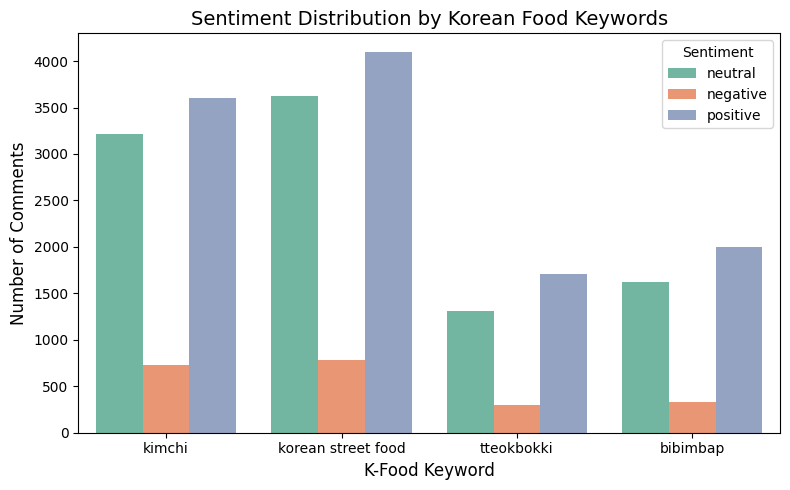

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(data=df_comments, x='keyword', hue='sentiment', palette='Set2')

plt.title('Sentiment Distribution by Korean Food Keywords', fontsize=14)
plt.xlabel('K-Food Keyword', fontsize=12)
plt.ylabel('Number of Comments', fontsize=12)
plt.legend(title='Sentiment', loc='upper right')
plt.tight_layout()
plt.show()

🔶 STEP 2: 감성 점수(POLARITY) 평균 비교
감정이 "긍정"이라고 해서 모두 다 똑같은 긍정은 아니죠.
TextBlob은 -1.0 ~ 1.0 범위의 정량적 감정 점수도 제공합니다.
이걸 활용해서 음식별 평균 감정 점수를 비교해볼게요.

✅ 1. 감성 점수(polarity) 계산

In [28]:
from textblob import TextBlob

def get_polarity(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return 0

df_comments['polarity'] = df_comments['comment_body'].apply(get_polarity)

✅ 2. 음식 키워드별 평균 감성 점수 계산

In [29]:
df_polarity_mean = df_comments.groupby('keyword')['polarity'].mean().reset_index()
df_polarity_mean.sort_values(by='polarity', ascending=False)

keyword  polarity
0            bibimbap  0.191576
3          tteokbokki  0.189839
1              kimchi  0.159217
2  korean street food  0.155834

from matplotlib import pyplot as plt
_df_0['polarity'].plot(kind='hist', bins=20, title='polarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('keyword').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['polarity'].plot(kind='line', figsize=(8, 4), title='polarity')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['keyword'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='polarity', y='keyword', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_4['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['polarity'].plot(kind='hist', bins=20, title='polarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('keyword').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='index', y='polarity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['polarity'].plot(kind='line', figsize=(8, 4), title='polarity')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['keyword'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='index', y='keyword', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['keyword'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='polarity', y='keyword', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

✅ 3. 바 차트로 시각화

<ipython-input-33-38b85b17c4a1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=df_polarity_mean, x='keyword', y='polarity', palette='coolwarm')


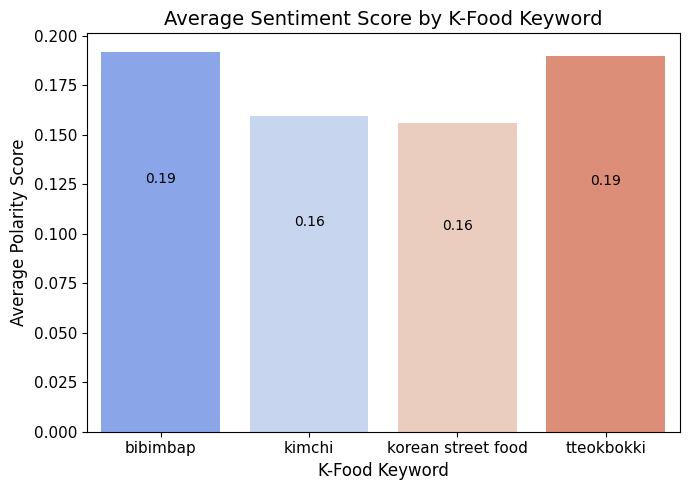

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
barplot = sns.barplot(data=df_polarity_mean, x='keyword', y='polarity', palette='coolwarm')

plt.title('Average Sentiment Score by K-Food Keyword', fontsize=14)
plt.xlabel('K-Food Keyword', fontsize=12)
plt.ylabel('Average Polarity Score', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# 바 내부 2/3 지점에 숫자 표시
for index, row in df_polarity_mean.iterrows():
    value = row.polarity
    barplot.text(index, value * 2 / 3, f"{value:.2f}", color='black', ha="center", va="center", fontsize=10)

plt.tight_layout()
plt.show()

In [34]:
df_comments.groupby('keyword')['polarity'].describe()

count      mean       std  min  25%       50%       75%  \
keyword                                                                        
bibimbap            3961.0  0.191576  0.316901 -1.0  0.0  0.105455  0.375000   
kimchi              7538.0  0.159217  0.290435 -1.0  0.0  0.084861  0.300000   
korean street food  8497.0  0.155834  0.279120 -1.0  0.0  0.091964  0.290909   
tteokbokki          3315.0  0.189839  0.312002 -1.0  0.0  0.121236  0.353646   

                    max  
keyword                  
bibimbap            1.0  
kimchi              1.0  
korean street food  1.0  
tteokbokki          1.0

from matplotlib import pyplot as plt
_df_12['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['50%'].plot(kind='hist', bins=20, title='50%')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_16.groupby('keyword').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='std', y='50%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='50%', y='75%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['min']
  ys = series['count']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('min', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('keyword')):
  _plot_series(series, series_name, i)
  fig.legend(title='keyword', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('count')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['min']
  ys = series['mean']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('min', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('keyword')):
  _plot_series(series, series_name, i)
  fig.legend(title='keyword', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('mean')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['min']
  ys = series['std']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('min', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('keyword')):
  _plot_series(series, series_name, i)
  fig.legend(title='keyword', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('std')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['min']
  ys = series['50%']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('min', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('keyword')):
  _plot_series(series, series_name, i)
  fig.legend(title='keyword', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('min')
_ = plt.ylabel('50%')

from matplotlib import pyplot as plt
_df_25['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_28['50%'].plot(kind='line', figsize=(8, 4), title='50%')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['keyword'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='count', y='keyword', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['keyword'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='mean', y='keyword', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_31['keyword'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_31, x='std', y='keyword', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_32['keyword'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_32, x='50%', y='keyword', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

🔧 시각화로 차이를 강조하는 방법

# Boxplot으로 감성 점수 분포 비교
→ 평균은 비슷해도 분포와 중앙값은 다르다는 걸 한눈에 보여줍니다.

<ipython-input-39-012b6b539fa9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comments, x='keyword', y='polarity', palette='Set3')


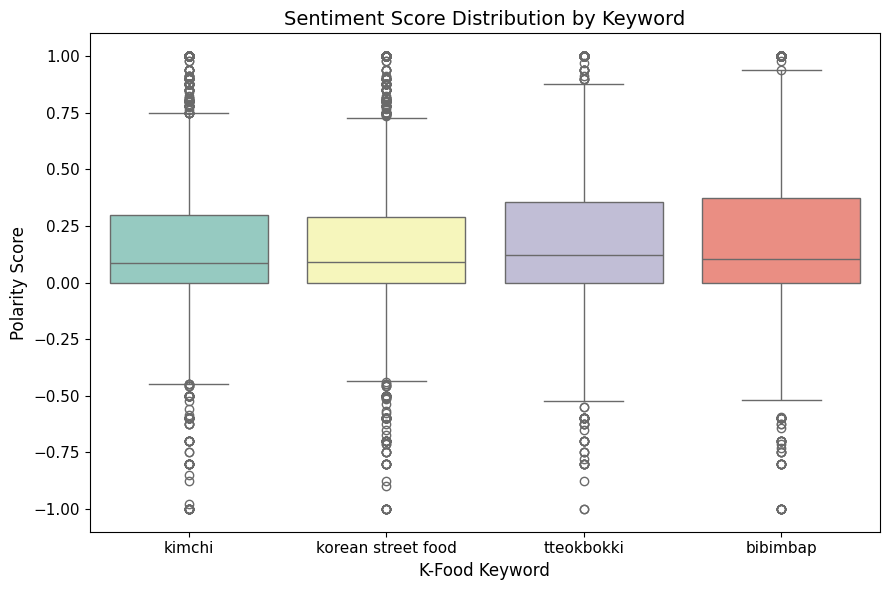

In [39]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=df_comments, x='keyword', y='polarity', palette='Set3')
plt.title('Sentiment Score Distribution by Keyword', fontsize=14)
plt.xlabel('K-Food Keyword', fontsize=12)
plt.ylabel('Polarity Score', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

##🧠 논문용 해석 예시: 표면적으로 감성 점수 평균은 유사하였으나, 상위 분위수와 중앙값, 표준편차에서 차이가 관찰되었다##
##특히 비빔밥은 감성 표현이 다양하게 나타났으며, 떡볶이는 상대적으로 긍정적인 반응 비율이 높았다.##
##반면 김치와 street food는 보다 안정적인(덜 극단적인) 감정 표현을 보였다.##

# STEP 3: 워드클라우드 (WordCloud) 분석

✅ 1. 워드클라우드 생성에 필요한 라이브러리 설치

In [80]:
!pip install wordcloud

✅ 2. 워드클라우드 기본 함수 정의

In [81]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud_by_keyword(df, keyword):
    # 특정 음식에 해당하는 댓글 추출
    text = ' '.join(df[df['keyword'] == keyword]['comment_body'].astype(str).values)

    # 워드클라우드 생성
    wordcloud = WordCloud(width=800, height=400,
                          background_color='white',
                          max_words=100).generate(text)

    # 시각화
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for '{keyword}'", fontsize=16)
    plt.tight_layout()
    plt.show()

✅ 3. 각 음식 키워드별로 워드클라우드 실행

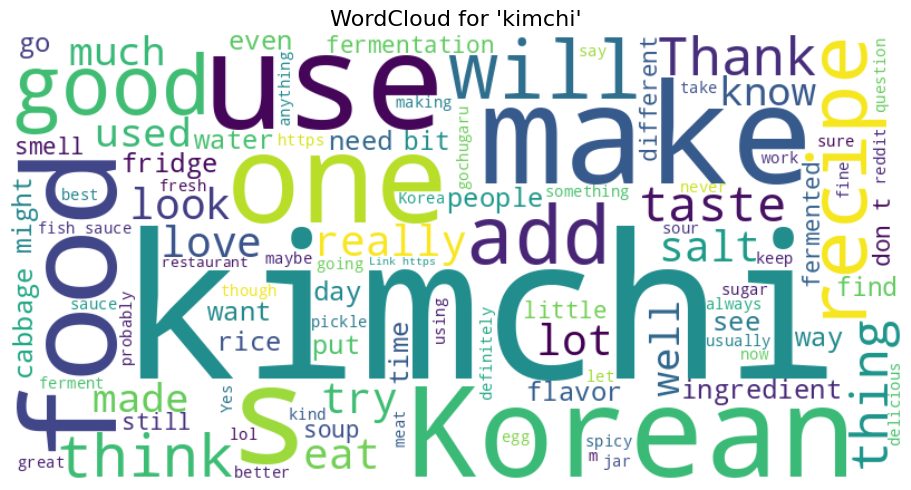

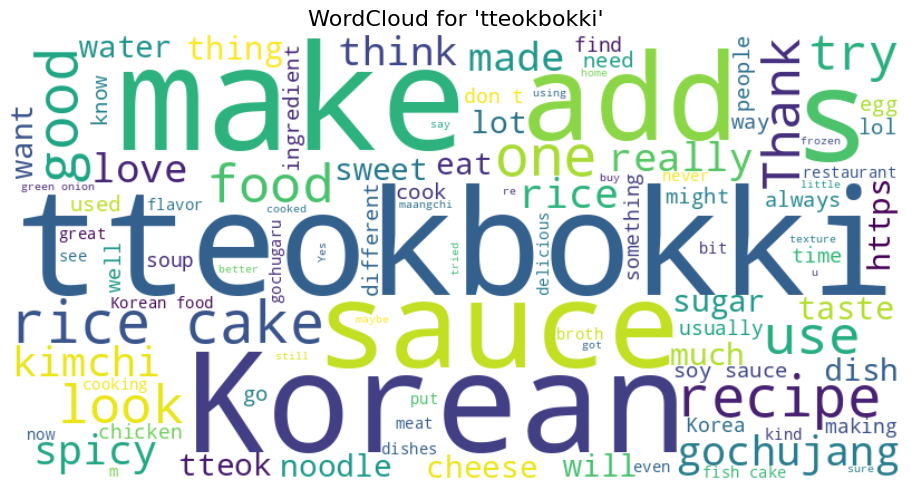

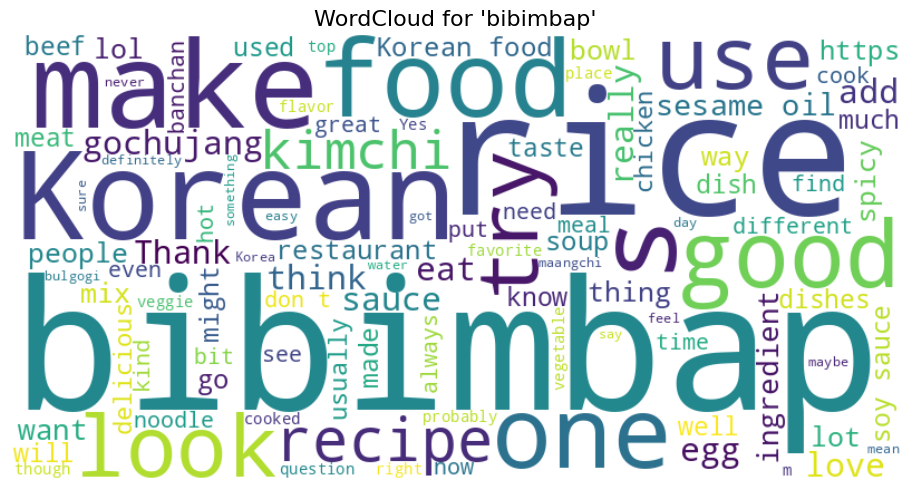

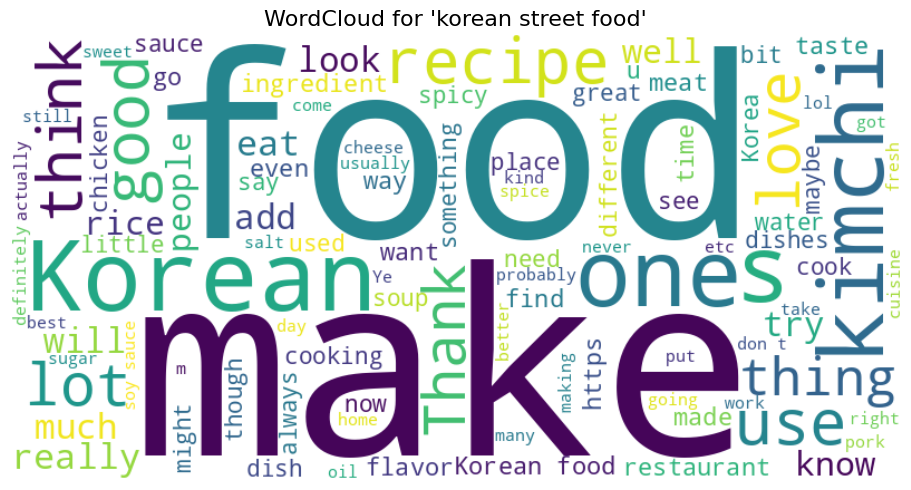

In [82]:
# 김치
show_wordcloud_by_keyword(df_comments, 'kimchi')

# 떡볶이
show_wordcloud_by_keyword(df_comments, 'tteokbokki')

# 비빔밥
show_wordcloud_by_keyword(df_comments, 'bibimbap')

# korean street food
show_wordcloud_by_keyword(df_comments, 'korean street food')

💎 특별한 워드클라우드 만들기 전략

In [83]:
!pip install wordcloud matplotlib numpy
!apt-get -qq install fonts-nanum

In [84]:
!pip install wordcloud matplotlib numpy
!apt-get -qq install fonts-nanum

In [85]:
# 원형 마스크 만들기
def circular_mask(size=600):
    x, y = np.ogrid[:size, :size]
    mask = (x - size/2) ** 2 + (y - size/2) ** 2 > (size/2) ** 2
    mask = 255 * mask.astype(int)
    return mask

In [86]:
def beautiful_wordcloud(df, keyword, color='Oranges', size=600):
    text = ' '.join(df[df['keyword'] == keyword]['comment_body'].astype(str).values)

    # 불용어 정의 (WordCloud 내장 + 추가)
    stopwords = set(STOPWORDS)
    stopwords.update(['like', 'get', 'just', 'really', 'make', 'one', 'would', 'bit', 'also', 'think'])

    wordcloud = WordCloud(
        width=size,
        height=size,
        background_color='white',
        stopwords=stopwords,
        colormap=color,
        mask=circular_mask(size),
        contour_width=1,
        contour_color='gray',
        font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    ).generate(text)

    plt.figure(figsize=(7, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud: {keyword.capitalize()}", fontsize=16)
    plt.tight_layout()
    plt.show()

In [87]:
from wordcloud import WordCloud, STOPWORDS

In [88]:
# 1. 필요 라이브러리
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import numpy as np

# 2. 원형 마스크 만들기
def circular_mask(size=600):
    x, y = np.ogrid[:size, :size]
    mask = (x - size/2) ** 2 + (y - size/2) ** 2 > (size/2) ** 2
    mask = 255 * mask.astype(int)
    return mask

# 3. 예쁜 워드클라우드 함수
def beautiful_wordcloud(df, keyword, color='Oranges', size=600):
    text = ' '.join(df[df['keyword'] == keyword]['comment_body'].astype(str).values)

    stopwords = set(STOPWORDS)
    stopwords.update(['like', 'get', 'just', 'really', 'make', 'one', 'would', 'bit', 'also', 'think'])

    wordcloud = WordCloud(
        width=size,
        height=size,
        background_color='white',
        stopwords=stopwords,
        colormap=color,
        mask=circular_mask(size),
        contour_width=1,
        contour_color='gray',
        font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    ).generate(text)

    plt.figure(figsize=(7, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud: {keyword.capitalize()}", fontsize=16)
    plt.tight_layout()
    plt.show()

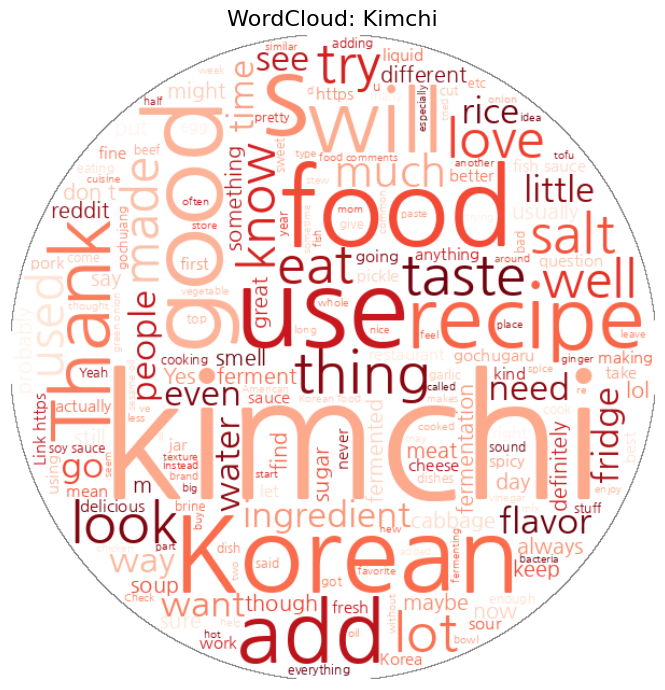

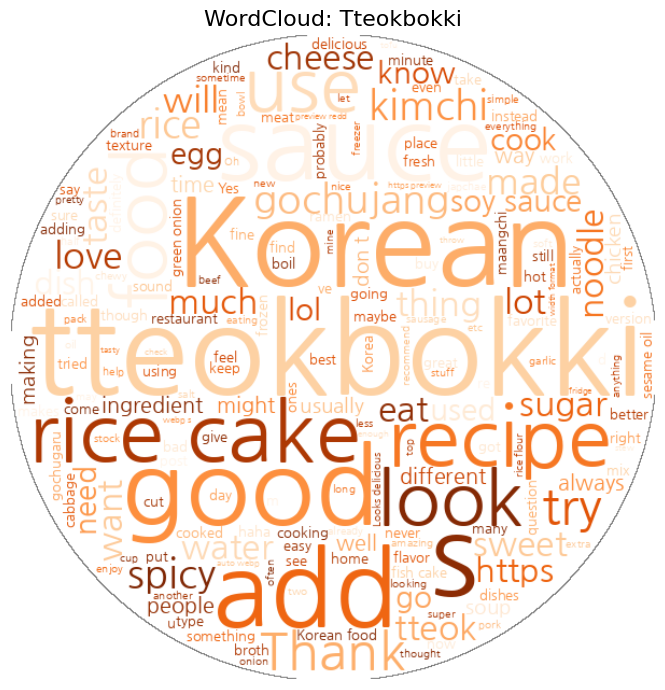

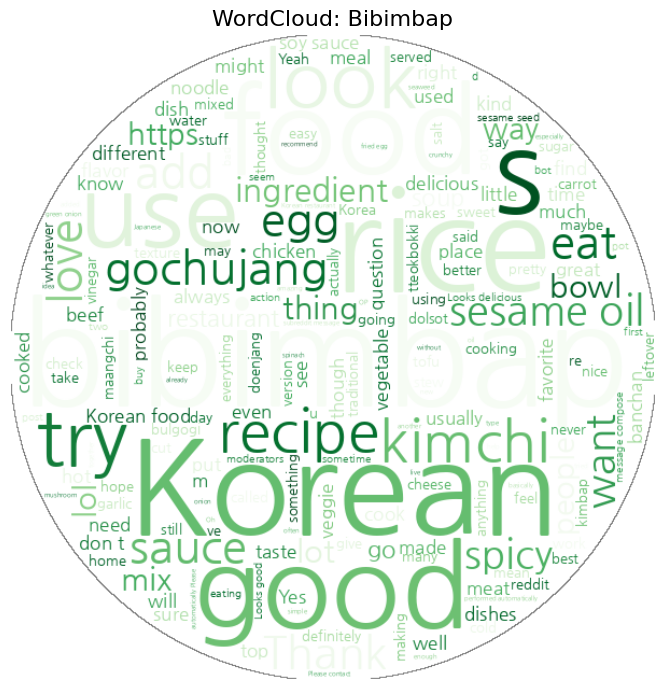

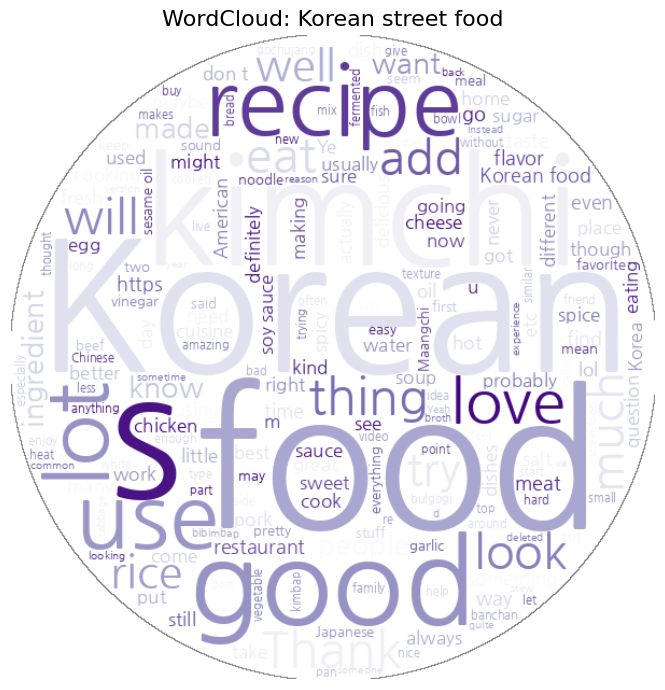

In [89]:
beautiful_wordcloud(df_comments, 'kimchi', color='Reds')
beautiful_wordcloud(df_comments, 'tteokbokki', color='Oranges')
beautiful_wordcloud(df_comments, 'bibimbap', color='Greens')
beautiful_wordcloud(df_comments, 'korean street food', color='Purples')

# TF-IDF 분석 (음식별 고유 키워드 추출)

✅ 1. 라이브러리 설치 및 임포트

In [63]:
!pip install scikit-learn

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

✅ 2. 음식별 댓글 통합 → 텍스트 코퍼스 생성

In [64]:
# keyword 기준 그룹핑: 하나의 문자열로 합치기
grouped_comments = df_comments.groupby('keyword')['comment_body'].apply(lambda texts: ' '.join(texts.astype(str)))
grouped_comments = grouped_comments.reset_index()

✅ 3. TF-IDF 벡터화

In [65]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(grouped_comments['comment_body'])

# 단어 리스트 추출
words = vectorizer.get_feature_names_out()

# TF-IDF DataFrame 생성
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=grouped_comments['keyword'], columns=words)

✅ 4. 각 음식 키워드별 상위 단어 추출

In [66]:
topn = 10  # 상위 n개 단어

for keyword in tfidf_df.index:
    print(f"\n🔸 Top {topn} keywords for '{keyword}':")
    top_words = tfidf_df.loc[keyword].sort_values(ascending=False).head(topn)
    for word, score in top_words.items():
        print(f"{word:<15} : {score:.4f}")


🔸 Top 10 keywords for 'bibimbap':
like            : 0.3150
korean          : 0.2919
rice            : 0.2896
bibimbap        : 0.2366
food            : 0.2259
just            : 0.1963
good            : 0.1863
make            : 0.1663
looks           : 0.1663
sauce           : 0.1590

🔸 Top 10 keywords for 'kimchi':
kimchi          : 0.5290
like            : 0.3095
just            : 0.2154
korean          : 0.1751
food            : 0.1715
make            : 0.1595
good            : 0.1466
don             : 0.1365
use             : 0.1284
rice            : 0.1234

🔸 Top 10 keywords for 'korean street food':
like            : 0.3408
korean          : 0.3031
food            : 0.2895
just            : 0.2370
kimchi          : 0.1968
make            : 0.1675
good            : 0.1592
rice            : 0.1524
don             : 0.1490
sauce           : 0.1208

🔸 Top 10 keywords for 'tteokbokki':
like            : 0.3185
rice            : 0.2958
korean          : 0.2565
tteokbokki      : 0.2167


🔶 STEP 2: 대표 댓글 추출 (Representative Comments)

✅ 1. 기본 전처리 확인

In [67]:
df_comments[['keyword', 'sentiment', 'comment_body']].head()

keyword sentiment                                       comment_body
0  kimchi   neutral  Were the ribs tender?\n\nThe last recipe I use...
1  kimchi   neutral                 you made the lettuce from scratch?
2  kimchi  negative  The ribs were tender. I had the butcher cut th...
3  kimchi   neutral                    Grew it in our garden, so yeah?
4  kimchi  positive  I tried to be sassy about it but I concede. Th...

✅ 2. 대표 댓글 추출 함수 정의

In [68]:
def extract_representative_comments(df, keyword, sentiment, n=5):
    filtered = df[(df['keyword'] == keyword) & (df['sentiment'] == sentiment)]
    return filtered['comment_body'].dropna().sample(n=min(n, len(filtered)), random_state=42).tolist()

✅ 3. 음식별 감성별 대표 댓글 추출 실행

In [69]:
food_keywords = ['kimchi', 'tteokbokki', 'bibimbap', 'korean street food']
sentiments = ['positive', 'negative', 'neutral']
n = 5  # 각 감성당 최대 추출 개수

representative_comments = {}

for food in food_keywords:
    representative_comments[food] = {}
    for s in sentiments:
        comments = extract_representative_comments(df_comments, food, s, n)
        representative_comments[food][s] = comments

✅ 4. 결과 예시 출력

In [70]:
for food, sentiments_dict in representative_comments.items():
    print(f"\n🍽️ {food.capitalize()}")
    for s, comments in sentiments_dict.items():
        print(f"\n  [{s.upper()}]")
        for c in comments:
            print(f"   • {c.strip()[:120]}{'...' if len(c) > 120 else ''}")


🍽️ Kimchi

  [POSITIVE]
   • That might be hard, there are barely any Koreans in Poland lol
   • This is my dream meal. Anything with rice, lots of veggies and heat is my ideal.
   • Everything looks great and I am extremely jealous of the beard!
   • True, it doesn't really jump out to me as "chili",
[but man, doesn't this traditional serving of Cincinnati chili just s...
   • I make my own side dishes and kimchi, but I’ll occasionally buy store bought. Of the brands that you shared, I’ve only t...

  [NEGATIVE]
   • Bulgarian:

- Garlic
- Savory
- Spearmint (Mentha Spicata)
- Onion
- Cumin
- Dill
- Paprika

- Pork
- Potatoes
- Beans (...
   • Also buttermilk, chicken and beef liver, butter, lard, bacon, BBQ sauce of all varieties, mayo, sour cream and pickled v...
   • As long as its plain. Fruit Soju has sugar, for one thing.
   • Jeon Jungkook 🤣🤣
Sorry I had to.
   • The kimchi pickles are disgusting lmfao

  [NEUTRAL]
   • I've never made a soup on a rolling boil, just simmering.

# 🔶 STEP 3: 감성 점수 차이 통계 검정 (t-test / ANOVA)

**🎯 분석 목적**
음식 키워드별로 소비자 감성 점수(polarity)에 유의미한 차이가 존재하는지를 통계적으로 검정합니다.

귀무가설 H₀: 모든 음식의 감성 점수 평균은 같다

대립가설 H₁: 적어도 하나의 음식은 감성 점수 평균이 다르다

✅ 1. 필요한 라이브러리 불러오기

In [71]:
from scipy.stats import f_oneway, ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

✅ 2. 음식별 감성 점수 분포 시각화

<ipython-input-72-fbf4fe235fbd>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_comments, x='keyword', y='polarity', palette='Set2')


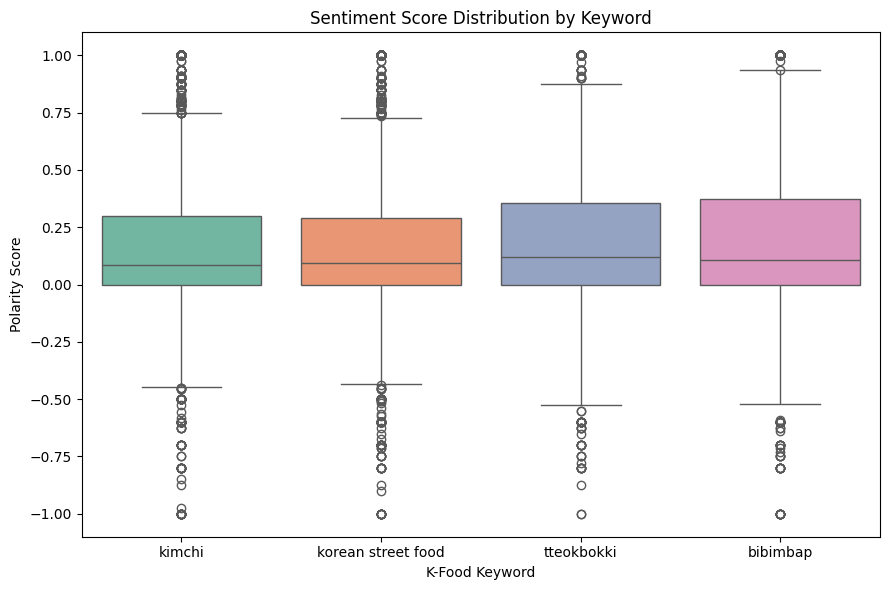

In [72]:
plt.figure(figsize=(9, 6))
sns.boxplot(data=df_comments, x='keyword', y='polarity', palette='Set2')
plt.title('Sentiment Score Distribution by Keyword')
plt.xlabel('K-Food Keyword')
plt.ylabel('Polarity Score')
plt.tight_layout()
plt.show()

✅ 3. ANOVA (분산분석) 실행

In [73]:
# 음식별 polarity 리스트
grouped = df_comments.groupby('keyword')['polarity']

# 그룹별 데이터 분리
kimchi_scores = grouped.get_group('kimchi')
tteokbokki_scores = grouped.get_group('tteokbokki')
bibimbap_scores = grouped.get_group('bibimbap')
streetfood_scores = grouped.get_group('korean street food')

# 일원분산분석 (one-way ANOVA)
anova_result = f_oneway(kimchi_scores, tteokbokki_scores, bibimbap_scores, streetfood_scores)

print("📊 ANOVA 결과:")
print(f"F-statistic: {anova_result.statistic:.4f}")
print(f"p-value: {anova_result.pvalue:.4f}")

📊 ANOVA 결과:
F-statistic: 21.6408
p-value: 0.0000


✅ 4. 해석 기준

항목	기준	해석
p < 0.05	유의미함	음식 간 감정 점수 평균에 통계적 차이 있음
p ≥ 0.05	유의미하지 않음	차이가 우연일 수 있음, 유사함

✅ 5. 모든 쌍에 대해 t-test 실행

예:

김치 vs 떡볶이

김치 vs 비빔밥

김치 vs street food

떡볶이 vs 비빔밥

떡볶이 vs street food

비빔밥 vs street food

✅ 1. 전체 코드: 모든 쌍에 대한 t-test 실행

In [75]:
from itertools import combinations
from scipy.stats import ttest_ind

# 키워드별 감성 점수 그룹화
keywords = ['kimchi', 'tteokbokki', 'bibimbap', 'korean street food']
grouped_scores = {k: df_comments[df_comments['keyword'] == k]['polarity'] for k in keywords}

# 결과 저장용 리스트
ttest_results = []

# 모든 2개 키워드 조합에 대해 비교
for (k1, k2) in combinations(keywords, 2):
    scores1 = grouped_scores[k1]
    scores2 = grouped_scores[k2]
    ttest = ttest_ind(scores1, scores2, equal_var=False)
    ttest_results.append({
        'Group 1': k1,
        'Group 2': k2,
        't-statistic': round(ttest.statistic, 4),
        'p-value': round(ttest.pvalue, 5),
        'Significant (p < .05)': '✅' if ttest.pvalue < 0.05 else '❌'
    })

✅ 2. 결과 표로 출력

In [76]:
ttest_df = pd.DataFrame(ttest_results)
from IPython.display import display
display(ttest_df)

Group 1             Group 2  t-statistic  p-value Significant (p < .05)
0      kimchi          tteokbokki      -4.8085  0.00000                     ✅
1      kimchi            bibimbap      -5.3529  0.00000                     ✅
2      kimchi  korean street food       0.7496  0.45349                     ❌
3  tteokbokki            bibimbap      -0.2348  0.81435                     ❌
4  tteokbokki  korean street food       5.4779  0.00000                     ✅
5    bibimbap  korean street food       6.0830  0.00000                     ✅

In [78]:
import os

# 디렉토리 생성
os.makedirs("/mnt/data", exist_ok=True)

# 다시 저장 시도
ttest_df.to_csv(csv_path, index=False)
ttest_df.to_excel(excel_path, index=False)

csv_path, excel_path

('/mnt/data/kfood_ttest_results.csv', '/mnt/data/kfood_ttest_results.xlsx')

In [79]:
from google.colab import files

# CSV 다운로드
files.download('/mnt/data/kfood_ttest_results.csv')

# Excel 다운로드
files.download('/mnt/data/kfood_ttest_results.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>